<a href="https://colab.research.google.com/github/mayankdeshmukh/Data-Science-and-Machine-Learning/blob/main/Hierarchical_Clustering_EastWestAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hierarchical Clustering - East West Airlines

###Problem Statement - Perform clustering(Hierarchical) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

##Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Dataset

In [4]:
dataset = pd.read_csv("/content/EastWestAirlines.csv")

In [5]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
dataset.shape

(3999, 12)

In [8]:
dataset.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
dataset.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

##Normalizing Data

In [10]:
from sklearn.preprocessing import normalize
dataset_scaled = normalize(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns = dataset.columns)
dataset_scaled.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


##Dendrogram

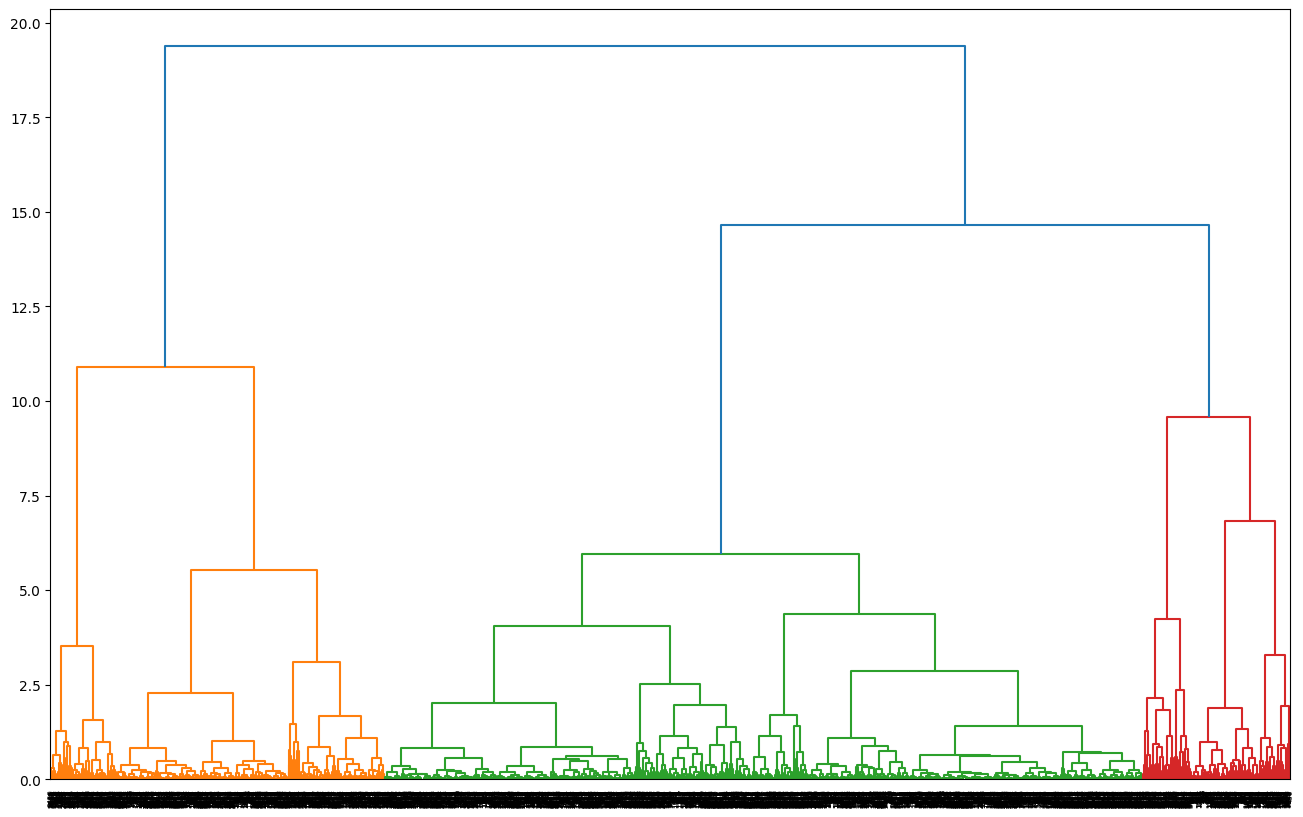

In [11]:
#Creating Dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (16, 10))
dendrogram = sch.dendrogram(sch.linkage(dataset_scaled, method = 'ward'))

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [13]:
y_hc = hc.fit_predict(dataset_scaled)
clusters = pd.DataFrame(y_hc, columns=['clusters'])
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,clusters
0,2
1,0
2,2
3,0
4,1
...,...
3994,2
3995,2
3996,1
3997,2


In [14]:
dataset_2 = pd.concat([dataset_scaled, clusters], axis = 1)
dataset_2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,2
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,2
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.193227,0.888739,0.0,0.000048,0.000048,0.000048,0.410072,0.000192,0.009620,0.000048,0.067488,0.000048,2
3995,0.062263,0.997710,0.0,0.000015,0.000015,0.000015,0.015202,0.000077,0.000000,0.000000,0.021617,0.000015,2
3996,0.051533,0.943692,0.0,0.000038,0.000013,0.000013,0.326292,0.000103,0.000000,0.000000,0.017977,0.000013,1
3997,0.073000,0.996925,0.0,0.000018,0.000018,0.000018,0.009080,0.000018,0.009080,0.000018,0.025441,0.000000,2


In [15]:
dataset_2.sort_values('clusters')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
1532,0.190771,0.742368,0.185592,0.000123,0.000123,0.000123,0.000000,0.000000,0.0,0.0,0.614859,0.0,0
1670,0.273330,0.580380,0.000000,0.000162,0.000162,0.000162,0.021075,0.000486,0.0,0.0,0.766815,0.0,0
1231,0.125256,0.838428,0.000000,0.000101,0.000101,0.000101,0.000000,0.000000,0.0,0.0,0.530424,0.0,0
1995,0.194825,0.850181,0.000000,0.000097,0.000097,0.000097,0.266287,0.001452,0.0,0.0,0.410275,0.0,0
591,0.050285,0.839322,0.000000,0.000084,0.000084,0.000084,0.000000,0.000000,0.0,0.0,0.541303,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,0.966286,0.148740,0.000000,0.000261,0.000261,0.000261,0.046970,0.001044,0.0,0.0,0.204843,0.0,4
2524,0.403569,0.781271,0.000000,0.000159,0.000159,0.000159,0.048403,0.000317,0.0,0.0,0.473714,0.0,4
3670,0.916118,0.272876,0.000000,0.000248,0.000248,0.000248,0.272876,0.000496,0.0,0.0,0.108654,0.0,4
3687,0.957468,0.258078,0.000000,0.000258,0.000258,0.000258,0.000000,0.000000,0.0,0.0,0.129039,0.0,4


In [16]:
#Visualizing the clusters
plt.scatter(dataset_2[y_hc == 0, 0], dataset_2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset_2[y_hc == 1, 0], dataset_2[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset_2[y_hc == 2, 0], dataset_2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dataset_2[y_hc == 3, 0], dataset_2[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(dataset_2[y_hc == 4, 0], dataset_2[y_hc == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.title('Clusters of passengers')
plt.xlabel()
plt.ylabel()
plt.legend()
plt.show()

InvalidIndexError: ignored